In [2]:
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
import ivolat3 as iv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
def option1(k,r,q,t,sigma,k1,r1,q1,t1,sigma1):
    call = {}
    callp = {}
    
    for i in range(18000,22000):
        price=iv.prem_call(i,k,r,q,t/365,sigma)
        delta = iv.delta_call(i,k,r,q,t/365,sigma)
        price1 = iv.prem_call(i,k1,r1,q1,t1/365,sigma1)
        delta1 = iv.delta_call(i,k1,r1,q1,t1/365,sigma1)
        
        call[i] = price, delta
        
        callp[i] = price1, delta1
    
    call = pd.DataFrame(call)
    call = call.T
    call.columns = ['price','delta']
    
    callp = pd.DataFrame(callp)
    callp = callp.T
    callp.columns = ['price', 'delta']
    
    fig = plt.figure(figsize=(8,8))
    ax = plt.subplot(2,1,1)
    ax.plot(call['price'])
    ax.plot(callp['price'])
    plt.title('Price')
    ax1 = plt.subplot(2,1,2)
    ax1.plot(call['delta'])
    ax1.plot(callp['delta'])
    plt.title('delta')

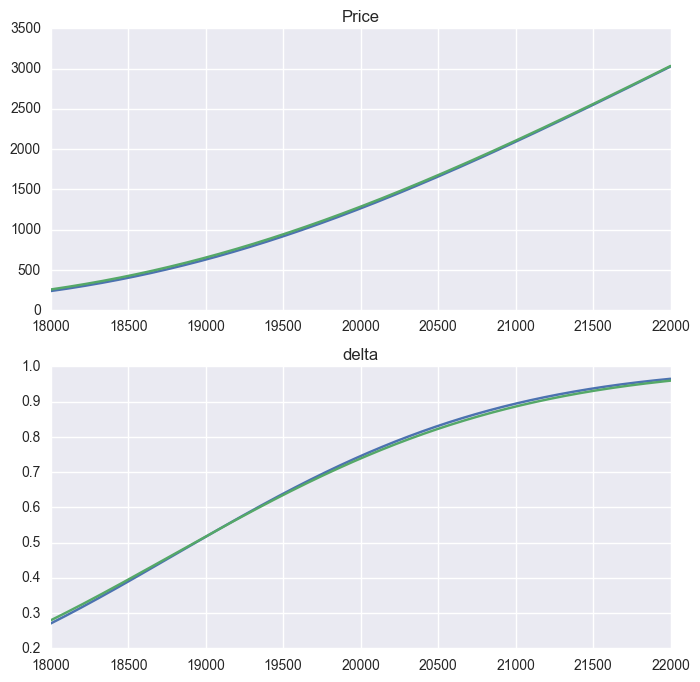

In [11]:
interact(option1, k=19000,r=0.001,q=0,t=30,sigma=0.3,k1=fixed(19000), r1=fixed(0.001),q1=fixed(0),t1=fixed(30), sigma1=fixed(0.3))